In [ ]:
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

diğer hücreye geçmeden çalışma zamanını yeniden başlat. SADECE YENİDEN  BAŞLAT

In [ ]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

The console stream is logged into /root/sg_logs/console.log


[2023-07-03 22:12:20] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-07-03 22:12:31] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-07-03 22:12:31] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-07-03 22:12:31] WARNING - export.py - Failed to import pytorch_quantization
[2023-07-03 22:12:31] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [ ]:
from IPython.display import clear_output

In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [ ]:
from super_gradients.training import models

In [ ]:
CHECKPOINT_DIR = 'checkpoints2'
trainer = Trainer(experiment_name='sign_yolonas_run2', ckpt_root_dir=CHECKPOINT_DIR)

# Exporting the Dataset from Roboflow into the Google Colab Notebook

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QQjZvj3FJKJGunQJ5Mzc")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
dataset = project.version(6).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to American-Sign-Language-Letters-6 in yolov5pytorch:: 100%|██████████| 1452/1452 [00:00<00:00, 1570.00it/s]


# Load your dataset parameters into a dictionary

You'll need to load your dataset parameters into a dictionary, specifically defining:

- path to the parent directory where your data lives
- the child directory names for training, validation, and test (if you have testing set) images and labels
- class names

In [ ]:
dataset_params = {
    'data_dir':'/content/American-Sign-Language-Letters-6',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['A', 'B', 'C', 'D', 'E', 'F', 'G','H', 'I', 'J', 'K', 'L','M','N','O', 'P', 'Q', 'R', 'S', 'T', 'U',  'V', 'W', 'X', 'Y', 'Z']
}

# Pass the values for dataset_params into the dataset_params argument as shown below.

In [ ]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

Caching annotations: 100%|██████████| 144/144 [00:00<00:00, 2433.56it/s]


# Inspect the Dataset Defined Earlier

In [ ]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': [640, 640], 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': [640, 640], 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5, 'max_targets': 120),
 DetectionPaddedRescale('swap': (2, 0, 1),

In [ ]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [ ]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

# Plot a batch of training data with their augmentations applied to see what they look like

Caching annotations: 100%|██████████| 72/72 [00:00<00:00, 2774.21it/s]


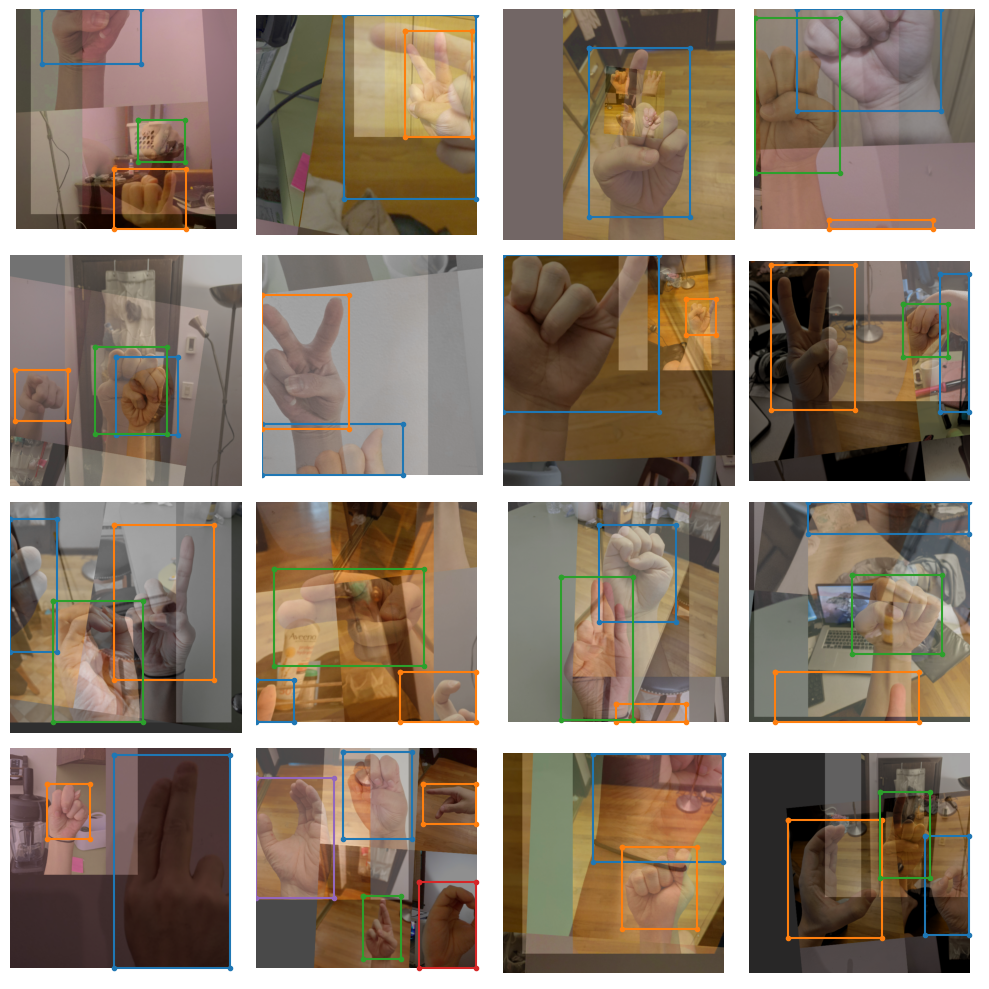

In [ ]:
train_data.dataset.plot()

# Instantiating the model
Note, for this tutorial we are using yolo_nas_s, but SuperGradients has two other flavors of YOLONAS available to you: yolo_nas_m and yolo_nas_l.

In [ ]:
# yolo_nas_s en küçük ama en hızlı olan model
model = models.get('yolo_nas_s',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2023-07-03 22:12:55] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


  0%|          | 0.00/73.1M [00:00<?, ?B/s]

Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth


# Define metrics and training parameters


*   max_epochs - Max number of training epochs

* loss - the loss function you want to use

* optimizer - Optimizer you will be using

* train_metrics_list - Metrics to log during training

* valid_metrics_list - Metrics to log during training

* metric_to_watch - metric which the model checkpoint will be saved according to

We can choose from a variety of optimizer's such as: Adam, AdamW, SGD, Lion, or RMSProps. If you choose to change the defualt parameters of these optimizrs you pass them into optimizer_params.



In [ ]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 25,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

# Training the model
Training a model using a SuperGradients is done using the trainer.

In [ ]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2023-07-03 22:13:03] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-07-03 22:13:07] INFO - utils.py - NumExpr defaulting to 2 threads.


The console stream is now moved to checkpoints2/sign_yolonas_run2/console_Jul03_22_13_07.txt


[2023-07-03 22:13:21] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 504        (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         31         (len(train_loader))
    - Gradient updates per epoch:   31         (len(train_loader) / batch_accumulate)

[2023-07-03 22:15:19] INFO - base_sg_logger.py - Checkpoint saved in checkpoints2/sign_yolonas_run2/ckpt_best.pth
[2023-07-03 22:15:19] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.0
[2023-07-03 22:17:15] INFO - base_sg_logger.py - Checkpoint saved in checkpoints2/sign_yo

SUMMARY OF EPOCH 25
├── Training
│   ├── Ppyoloeloss/loss = 1.7518
│   │   ├── Best until now = 1.7853 (↘ -0.0335)
│   │   └── Epoch N-1      = 1.7853 (↘ -0.0335)
│   ├── Ppyoloeloss/loss_cls = 1.0079
│   │   ├── Best until now = 1.0191 (↘ -0.0111)
│   │   └── Epoch N-1      = 1.0191 (↘ -0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.8958
│   │   ├── Best until now = 0.9182 (↘ -0.0225)
│   │   └── Epoch N-1      = 0.9182 (↘ -0.0225)
│   └── Ppyoloeloss/loss_iou = 0.1184
│       ├── Best until now = 0.1218 (↘ -0.0034)
│       └── Epoch N-1      = 0.1229 (↘ -0.0044)
└── Validation
    ├── F1@0.50 = 0.1492
    │   ├── Best until now = 0.1632 (↘ -0.014)
    │   └── Epoch N-1      = 0.1557 (↘ -0.0065)
    ├── Map@0.50 = 0.8394
    │   ├── Best until now = 0.8771 (↘ -0.0378)
    │   └── Epoch N-1      = 0.8771 (↘ -0.0378)
    ├── Ppyoloeloss/loss = 1.3232
    │   ├── Best until now = 1.2593 (↗ 0.0639)
    │   └── Epoch N-1      = 1.2593 (↗ 0.0639)
    ├── Ppyoloeloss/loss_cls = 0.8377
    │   ├── 

# Get the best trained model

In [ ]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="checkpoints2/sign_yolonas_run2/ckpt_best.pth")

[2023-07-03 23:21:11] INFO - checkpoint_utils.py - Successfully loaded model weights from checkpoints2/sign_yolonas_run2/ckpt_best.pth EMA checkpoint.


# Evaluating the best trained model on the test set

In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Test: 100%|██████████| 5/5 [00:03<00:00,  2.16it/s]

{'PPYoloELoss/loss_cls': 0.7968323,
 'PPYoloELoss/loss_iou': 0.06165392,
 'PPYoloELoss/loss_dfl': 0.67226005,
 'PPYoloELoss/loss': 1.2870971,
 'Precision@0.50': tensor(0.0937),
 'Recall@0.50': tensor(1.),
 'mAP@0.50': tensor(0.9014),
 'F1@0.50': tensor(0.1683)}

Tablodaki değerleri yorumlayalım:

PPYoloELoss/loss_cls değeri 0.7968323 olarak verilmiştir. Bu, modelin sınıflandırma kaybının bir ölçüsüdür. Düşük değerler daha iyi performansı gösterir.

PPYoloELoss/loss_iou değeri 0.06165392 olarak verilmiştir. Bu, modelin İoU (Intersection over Union) kaybının bir ölçüsüdür. Düşük değerler daha iyi performansı gösterir.

PPYoloELoss/loss_dfl değeri 0.67226005 olarak verilmiştir. Bu, modelin DFL (Distribution Focal Loss) kaybının bir ölçüsüdür. Düşük değerler daha iyi performansı gösterir.

PPYoloELoss/loss değeri 1.2870971 olarak verilmiştir. Bu, toplam kaybın bir ölçüsüdür. Düşük değerler daha iyi performansı gösterir.

Precision@0.50 değeri 0.0937 olarak verilmiştir. Bu, modelin 0.50 eşik değerine göre hassasiyetini gösterir. Hassasiyet, doğru pozitif tahminlerin toplam tahminlere oranını temsil eder. Düşük bir hassasiyet değeri, modelin çok fazla yanlış pozitif tahmin yaptığını gösterir.

Recall@0.50 değeri 1.0 olarak verilmiştir. Bu, modelin 0.50 eşik değerine göre geri çağırmasını (recall) gösterir. Geri çağırma, gerçek pozitif tahminlerin toplam gerçek pozitiflere oranını temsil eder. Yüksek bir geri çağırma değeri, modelin gerçek pozitiflerin çoğunu yakaladığını gösterir.

mAP@0.50 değeri 0.9014 olarak verilmiştir. Bu, modelin 0.50 eşik değerine göre ortalama hassasiyet (mean average precision) değerini gösterir. Yüksek bir ortalama hassasiyet değeri, modelin hem yüksek hassasiyet hem de yüksek geri çağırma elde ettiğini gösterir.

F1@0.50 değeri 0.1683 olarak verilmiştir. Bu, modelin 0.50 eşik değerine göre F1 skorunu gösterir. F1 skoru, hassasiyet ve geri çağırma değerlerinin harmonik ortalamasını temsil eder. Yüksek bir F1 skoru, hem iyi hassasiyet hem de iyi geri çağırma sağlayan bir modeli gösterir.

Sonuç olarak, bu metriklerin değerleri, modelin sınıflandırma kaybı, nesne tespiti başarısı ve doğruluk ölçütleri hakkında bilgi vermektedir. Düşük kayıp değerleri, yüksek hassasiyet, geri çağırma, ortalama hassasiyet ve F1 skorları arzu edilen bir model performansını yansıtmaktadır.

# Predicting with the best model

In [ ]:
img_url = '/content/American-Sign-Language-Letters-6/valid/images/B5_jpg.rf.e1802440715c4bbb6de84d150dfe73b8.jpg'
best_model.predict(img_url).show()

Output hidden; open in https://colab.research.google.com to view.